<a href="https://colab.research.google.com/github/ZahibVentura/M-todos-de-Optimizaci-n-/blob/main/Lotk_Volterra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt    #Se importan las librerias
from scipy.integrate import odeint
import random as rd

In [ ]:
y0 = [30,30] #poblacion inicial de conejos y lobos
t = np.linspace(0,30,100) #tiempo inicial y final con el numero de pasos dados

In [ ]:
alpha = 3.5
beta = 0.3  #Parametos de las ecuaciones diferenciales
gamma = 2.9
delta = 0.3

params = [alpha,beta,gamma,delta] #parametros de las ecuaciones diferenciales guardados en un arreglo

In [ ]:
def model(y,t,params):    #definimos función que calcule la poblacion al de lobos "y" y conejos "x" al tiempo t
  x = y[0]
  y = y[1]
  alpha = params[0]
  beta = params[1]    #se asignan los parametros dados a las variables
  gamma = params[2]
  delta = params[3]

#Ecuaciones de Lotk-Volterra
  dxdt = alpha*x - beta*x*y       #Cambio de la poblacion de presas
  dydt = delta*x*y - gamma*y      #Cambio de la poblacion de depredadores
  return [dxdt,dydt]  #Se regresa las poblaciones de cada uno al tiempo t

In [ ]:
z = odeint(model,y0,t,args=(params,)) #Integración numerica dada la funcion, condiciones iniciales, y parametros

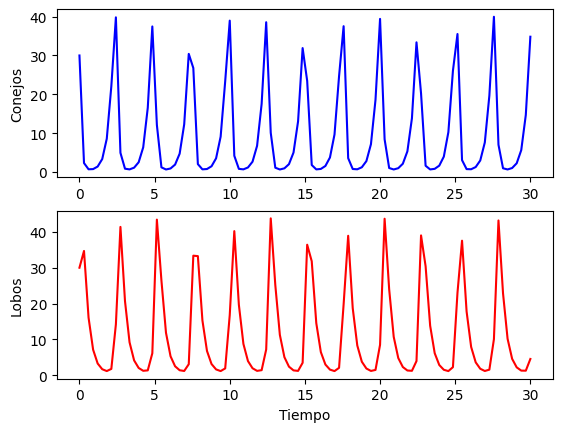

In [ ]:
#Grafico de las funciones
f,(ax1,ax2) = plt.subplots(2)

linel1 = ax1.plot(t,z[:,0],color="b")
linel2 = ax2.plot(t,z[:,1],color="r")

ax1.set_ylabel("Conejos")
ax2.set_ylabel("Lobos")
ax2.set_xlabel("Tiempo")
plt.show()

In [ ]:
# @title Codigo madre
a = 1.1
b = 0.4
d = 0.4
c = 0.1

P = 20
D = 20
listaP = [P]
listaD = [D]

for i in range(2000):
  lmb_P = P*(a - b*D)
  lmb_D = D*(-c + d*P)
  Delta_tp = np.random.exponential(abs(1/lmb_P)) if lmb_P != 0 else np.inf
  Delta_td = np.random.exponential(abs(1/lmb_D)) if lmb_D != 0 else np.inf


  if Delta_tp < Delta_td:
    if P == 0:
      break
    else:
      if np.sign(lmb_P) == 1:
        P += 1
      else:
        P -= 1
  else:
    if D == 0:
      break
    else:
      if np.sign(lmb_D) == 1:
        D += 1
      else:
        D -= 1
  listaP.append(P)
  listaD.append(D)

  print(f'Iteración {i+1} --> Presas: {P}, Depredadores: {D}')

Iteración 1 --> Presas: 20, Depredadores: 21
Iteración 2 --> Presas: 19, Depredadores: 21
Iteración 3 --> Presas: 18, Depredadores: 21
Iteración 4 --> Presas: 18, Depredadores: 22
Iteración 5 --> Presas: 18, Depredadores: 23
Iteración 6 --> Presas: 18, Depredadores: 24
Iteración 7 --> Presas: 17, Depredadores: 24
Iteración 8 --> Presas: 17, Depredadores: 25
Iteración 9 --> Presas: 16, Depredadores: 25
Iteración 10 --> Presas: 15, Depredadores: 25
Iteración 11 --> Presas: 14, Depredadores: 25
Iteración 12 --> Presas: 13, Depredadores: 25
Iteración 13 --> Presas: 13, Depredadores: 26
Iteración 14 --> Presas: 13, Depredadores: 27
Iteración 15 --> Presas: 13, Depredadores: 28
Iteración 16 --> Presas: 13, Depredadores: 29
Iteración 17 --> Presas: 12, Depredadores: 29
Iteración 18 --> Presas: 12, Depredadores: 30
Iteración 19 --> Presas: 12, Depredadores: 31
Iteración 20 --> Presas: 12, Depredadores: 32
Iteración 21 --> Presas: 12, Depredadores: 33
Iteración 22 --> Presas: 11, Depredadores: 

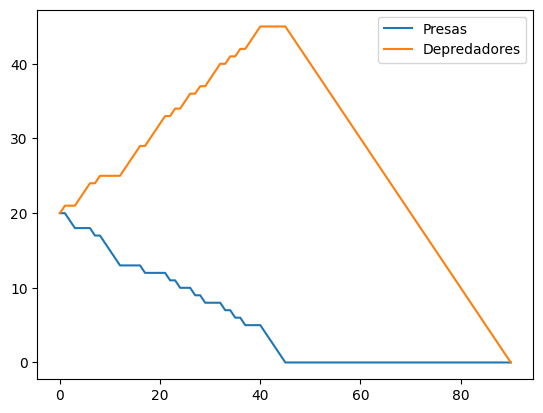

In [ ]:
plt.plot(listaP,label="Presas")
plt.plot(listaD,label="Depredadores")
plt.legend()
plt.show()

In [ ]:
#Definimos los parámetros
a = 3.5 #Tasa de nacimientos de presas
b = 0.3 #Tasa de muertes presas
d = 0.3 #Tasa de nacimientos depredadores
c = 3.0 #Tasa de muertes depredadores


#Poblaciones iniciales
P = 30 #Presas
D = 30 #Depredadores

#Listas para guardar el cambio de las poblaciones en cada iteración
listaP1 = [P]
listaD1 = [D]

# Variables para guardar el tiempo en cada estado
tiempo = 0
listaTiempo = []

#Definimos las generaciones
n = 2000

#Iniciamos el ciclo de iteraciones
for i in range(n):

  lmb_P_nace = a*P
  lmb_P_muere = b*P*D  # 4 Transiciones
  lmb_D_nace = d*D*P
  lmb_D_muere = c*D

  #Simulamos los tiempos de cada evento
  Delta_tp1 = np.random.exponential(1/lmb_P_nace) if lmb_P_nace > 0 else np.inf
  Delta_tp2 = np.random.exponential(1/lmb_P_muere) if lmb_P_muere > 0 else np.inf
  Delta_td1 = np.random.exponential(1/lmb_D_nace) if lmb_D_nace > 0 else np.inf
  Delta_td2 = np.random.exponential(1/lmb_D_muere) if lmb_D_muere > 0 else np.inf


  R = [Delta_tp1, Delta_tp2, Delta_td1, Delta_td2] #guardamos los valores en una lista
  t_min = min(R) #Tomamos el minimo de los valores, el cual nos dice que evento ocurre primero

  #Actualizamos el tiempo en cada iteración
  tiempo += t_min
  listaTiempo.append(tiempo) #Lo guardamos en una lista

  #Decidimos que evento ocurre, considerando el tiempo minimo
  if t_min == Delta_tp1:
    if P == 0:
      break
    else:
      P += 1 #Aumentar en 1 la población de presas

  elif t_min == Delta_tp2:
    if P == 0:
      break
    else:
      P -= 1 #Disminuir en 1 la población de presas

  elif t_min == Delta_td1:
    if D == 0:
      break
    else:
      D += 1 #Aumentar en 1 la población de depredadores

  elif t_min == Delta_td2:
    if D == 0:
      break
    else:
      D -= 1 #Disminuir en 1 la población de depredadores

  #Guardamos los valores de las poblaciones por cada iteración
  listaP1.append(P)
  listaD1.append(D)
 #Imprimir los valores e
  print(f'Iteración {i+1} --> Presas: {P}, Depredadores: {D}')


#print(len(listaTiempo))
#print(len(listaD1))
#print(len(listaP1))


Iteración 1 --> Presas: 29, Depredadores: 30
Iteración 2 --> Presas: 29, Depredadores: 31
Iteración 3 --> Presas: 28, Depredadores: 31
Iteración 4 --> Presas: 27, Depredadores: 31
Iteración 5 --> Presas: 26, Depredadores: 31
Iteración 6 --> Presas: 27, Depredadores: 31
Iteración 7 --> Presas: 26, Depredadores: 31
Iteración 8 --> Presas: 25, Depredadores: 31
Iteración 9 --> Presas: 26, Depredadores: 31
Iteración 10 --> Presas: 27, Depredadores: 31
Iteración 11 --> Presas: 27, Depredadores: 32
Iteración 12 --> Presas: 26, Depredadores: 32
Iteración 13 --> Presas: 26, Depredadores: 31
Iteración 14 --> Presas: 27, Depredadores: 31
Iteración 15 --> Presas: 28, Depredadores: 31
Iteración 16 --> Presas: 27, Depredadores: 31
Iteración 17 --> Presas: 27, Depredadores: 32
Iteración 18 --> Presas: 27, Depredadores: 33
Iteración 19 --> Presas: 27, Depredadores: 34
Iteración 20 --> Presas: 27, Depredadores: 35
Iteración 21 --> Presas: 27, Depredadores: 34
Iteración 22 --> Presas: 26, Depredadores: 

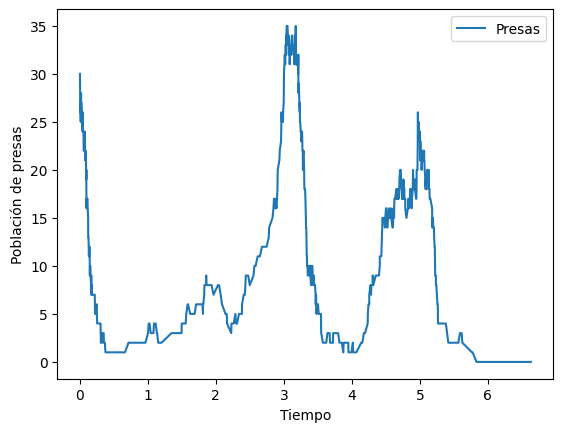

In [ ]:
# Gráfica de Presas respecto al tiempo
plt.plot(listaTiempo,listaP1,label="Presas")
plt.xlabel("Tiempo")
plt.ylabel("Población de presas")
plt.legend()
plt.show()

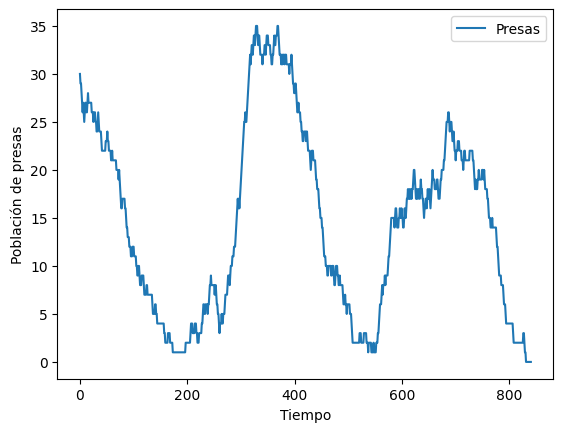

In [ ]:
# Gráfica de Presas respecto al tiempo
plt.plot(listaP1,label="Presas")
plt.xlabel("Tiempo")
plt.ylabel("Población de presas")
plt.legend()
plt.show()

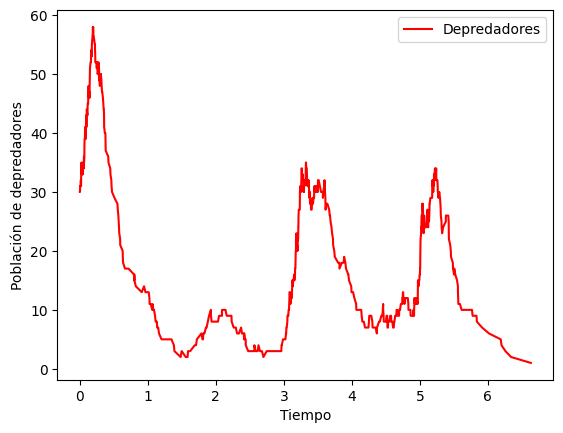

In [ ]:
#Gráfica de Depredadores respecto al tiempo
plt.plot(listaTiempo,listaD1,label="Depredadores",color = 'red')
plt.xlabel("Tiempo")
plt.ylabel("Población de depredadores")
plt.legend()
plt.show()

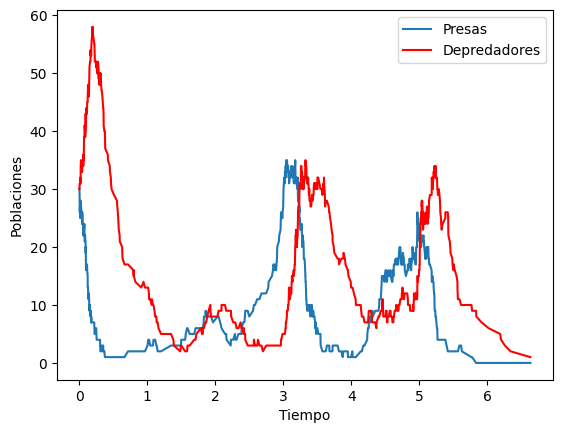

In [ ]:
#Comparación de ambos gráficos respecto al tiempo
plt.plot(listaTiempo,listaP1,label="Presas")
plt.plot(listaTiempo,listaD1,label="Depredadores",color = 'r')
plt.xlabel("Tiempo")
plt.ylabel("Poblaciones")
plt.legend()
plt.show()
#print(listaTiempo[800])

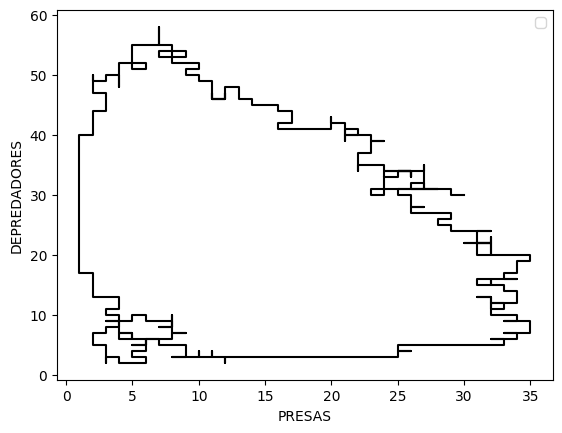

In [ ]:
#Comparación de ambos gráficos respecto a las poblaciones
plt.plot(listaP1[:420],listaD1[:420],color ='k')
plt.xlabel("PRESAS")
plt.ylabel("DEPREDADORES")
plt.legend()
plt.show()

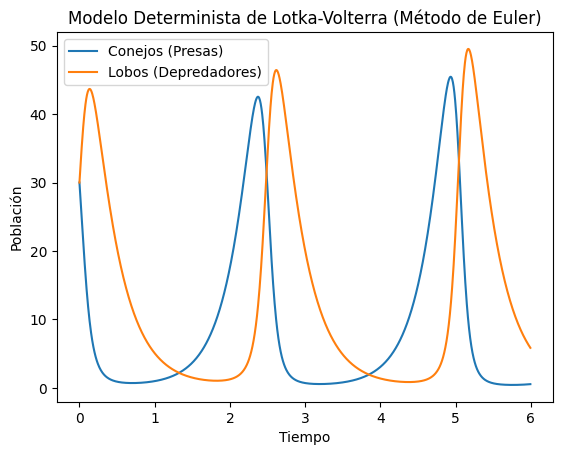

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
alpha = 3.5
beta = 0.3
gamma = 3.0
delta = 0.3
y0 = [30, 30]  # Población inicial de conejos (P) y lobos (D)
h = 0.005       # Paso temporal
t_max = 6     # Tiempo máximo de simulación

# Inicialización
P = y0[0]
D = y0[1]
tiempo = np.arange(0, t_max, h)
presa = []
depredador = []

# Método de Euler
for t in tiempo:
    presa.append(P)
    depredador.append(D)

    dP = alpha * P - beta * P * D
    dD = -gamma * D + delta * P * D

    P = P + h * dP
    D = D + h * dD

# Gráfica de los resultados
plt.plot(tiempo, presa, label="Conejos (Presas)")
plt.plot(tiempo, depredador, label="Lobos (Depredadores)")
plt.xlabel("Tiempo")
plt.ylabel("Población")
plt.legend()
plt.title("Modelo Determinista de Lotka-Volterra (Método de Euler)")
plt.show()


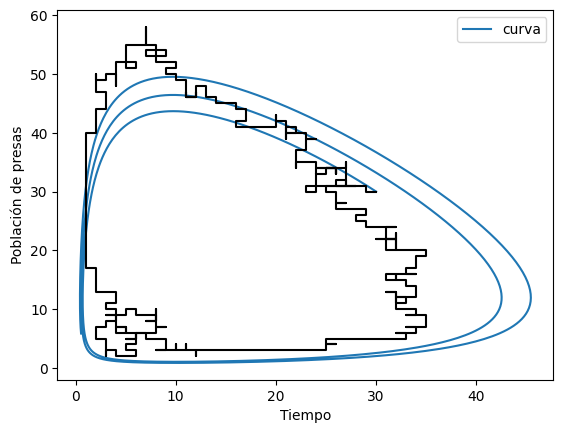

In [ ]:
plt.plot(presa, depredador, label="curva")
plt.plot(listaP1[:420],listaD1[:420],color ='k')
plt.xlabel("Tiempo")
plt.ylabel("Población de presas")
plt.legend()
plt.show()

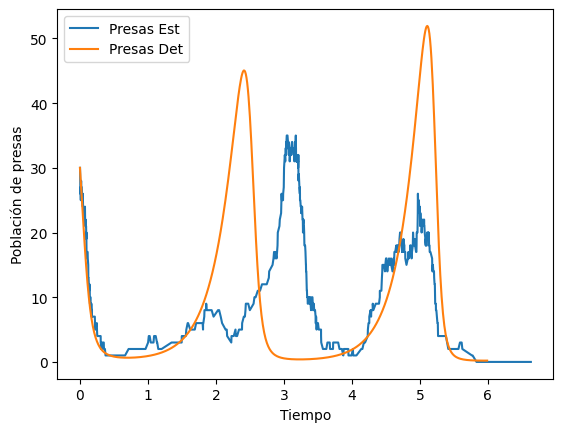

In [ ]:
# Gráfica de Presas respecto al tiempo
plt.plot(listaTiempo,listaP1,label="Presas Est ")
plt.plot(tiempo, presa, label="Presas Det")
plt.xlabel("Tiempo")
plt.ylabel("Población de presas")
plt.legend()
plt.show()